In [1]:
# only in case of diverge r2 score will be negative

## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
%matplotlib inline

#### Functions

In [3]:
def Loss_Epochs_plot(X, Y, xlabel, ylabel):
    fig = plt.figure()
    plt.plot(X, Y, marker = 'o')
    plt.grid(linewidth = 0.3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} Vs. {xlabel}")
    
def regression_lines_plot(X, Y, xlabel, ylabel):
    plt.plot(X, Y, 'r')
    plt.grid(linewidth = 0.3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} Vs. {xlabel}")
    
def training_report(a , b, c, d, e, f, g):
    print("\n****************** Training Report ********************\n")
    print(f"Gradient Descent converged after {int(a)} epochs")
    print(f"\ntheta_0_Opt : {b}\ntheta__Opt : {c}")
    print("\nError Vector:\n", d)
    print("\nCost = ", e)
    print("\nh(x) = y_predict:\n", f)
    print("\ny_actual:\n", g)
    
def all_plots(m, X, Y, Y_pred):
    theta_0 = m[:, 1]
    theta_1 = m[:, 2]

    cost = m[:, 3]
    x = m[:, 0]
    fig = plt.figure()
    Loss_Epochs_plot(x, cost, 'Ephocs', 'Loss')

    Loss_Epochs_plot(theta_0, cost, 'theta_0', "Loss")
    plt.title("Learning Rate = 0.0005")
    Loss_Epochs_plot(theta_1, cost, "theta_1", "Loss")
    plt.title("Learning Rate = 0.0005")

    fig = plt.figure()
    plt.plot(X, Y, 'ob')
    for i in Y_pred:
        regression_lines_plot(X, i, "x", "y")
    
    fig = plt.figure()
    plt.plot(X, Y, 'ob', markersize = 4)
    regression_lines_plot(X, Y_pred[-1], "x", "y")

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [4]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [5]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

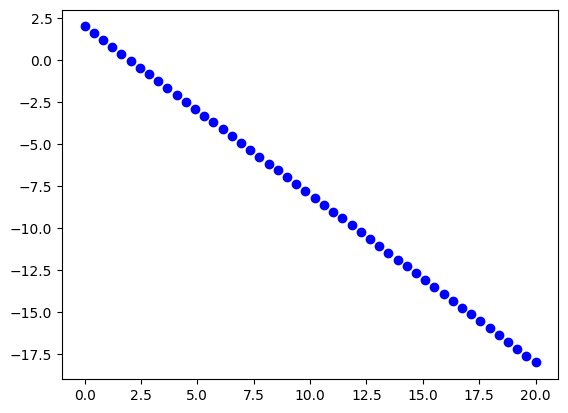

In [6]:
plt.plot(X, y, 'ob')

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [7]:
def GD_single_var(X, Y, LR, Max_iter):
    # step_1
    theta_0 = 0
    theta_1 = 0
    m = len(X)
    Y_pred = []
    Thetas_Cost = []
        
    for i in range(Max_iter):
        print(f"\n****************** Training {i} ********************")
    # step_2:
        y_pred = theta_0 + (theta_1*X)
        print("\nh(x):\n", y_pred)
        Y_pred.append(y_pred)
        
    # step_3
        Error = y_pred - Y
        cost = (1/(2*m)) * (Error @ Error)   
        print("\nError Vector:\n", Error)
        print("\nj: ", cost)
        
        Thetas_Cost.append([i, theta_0, theta_1, cost])         # append values of thetas and cost 
    
    # step_4
        d_theta_0 = (1/m) * sum(Error * 1)
        d_theta_1 = (1/m) * sum(Error * X)
        GV = [[d_theta_0], 
             [d_theta_1]]
        GV_norm = np.linalg.norm(GV)
        print("\nGradient Vector:\n", GV)
        print("\nGradient Vector Norm:\n", GV_norm)
        
        if (GV_norm < 0.001) or ((i > 0) and (abs(Thetas_Cost[i][3] - Thetas_Cost[i-1][3])) < 0.001):       # (Gradient Check, convergence check)
            break
    
    # step_5
        theta_0 = theta_0 - (LR * d_theta_0)
        theta_1 = theta_1 - (LR * d_theta_1)
        print("\ntheta_0_new: ", theta_0)
        print("theta_1_new: ", theta_1)
    
    return np.array(Thetas_Cost), Error, np.array(Y_pred), [theta_0, theta_1]
    

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [8]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = GD_single_var(X, y, 0.0005, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new:  -0.004
theta_1_new:  -0.0573469

In [9]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9686158031920962


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

<Figure size 640x480 with 0 Axes>

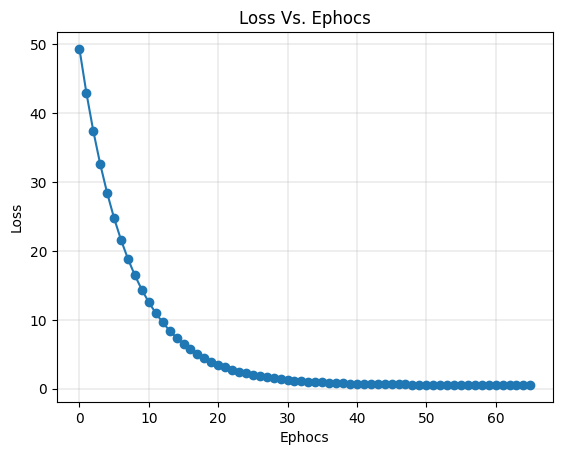

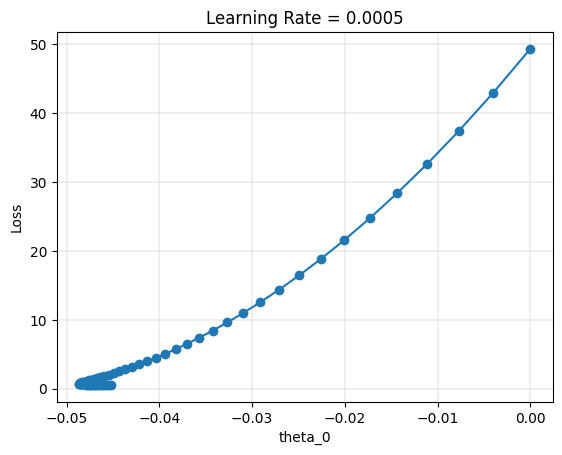

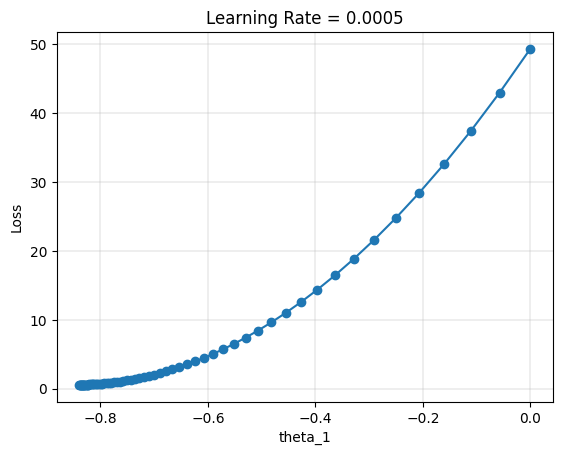

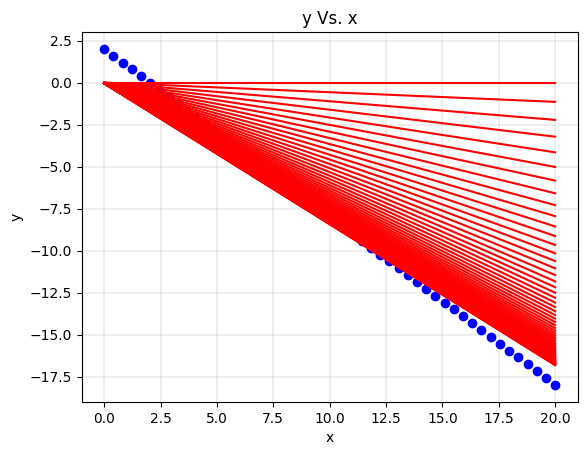

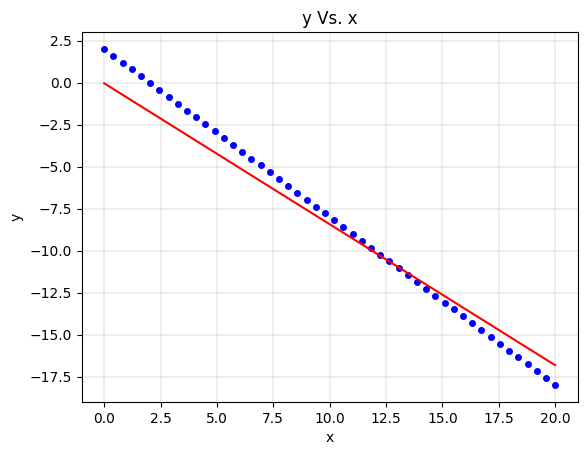

In [10]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [11]:
def Mom_BGD_single_var(X, Y, LR, G, Max_iter):
    # step_1
    theta_0 = 0
    theta_1 = 0
    v_t_0 = 0
    v_t_1 = 0
    m = len(X)
    Y_pred = []
    Thetas_Cost = []
        
    for i in range(Max_iter):
        print(f"\n****************** Training {i} ********************")
    # step_2:
        y_pred = theta_0 + (theta_1*X)
        print("\nh(x):\n", y_pred)
        Y_pred.append(y_pred)
        
    # step_3
        Error = y_pred - Y
        cost = (1/(2*m)) * (Error @ Error)   
        print("\nError Vector:\n", Error)
        print("\nj: ", cost)
        
        Thetas_Cost.append([i, theta_0, theta_1, cost])         # append values of thetas and cost 
    
    # step_4
        d_theta_0 = (1/m) * sum(Error * 1)
        d_theta_1 = (1/m) * sum(Error * X)
        GV = [[d_theta_0], 
             [d_theta_1]]
        GV_norm = np.linalg.norm(GV)
        print("\nGradient Vector:\n", GV)
        print("\nGradient Vector Norm:\n", GV_norm)
        
        if (GV_norm < 0.001) or ((i > 0) and (abs(Thetas_Cost[i][3] - Thetas_Cost[i-1][3])) < 0.001):       # (Gradient Check, convergence check)
            break
    
    # step_5
        v_t_0 = (G * v_t_0) + (LR * d_theta_0)
        v_t_1 = (G * v_t_1) + (LR * d_theta_1)
        theta_0 = theta_0 - (v_t_0)
        theta_1 = theta_1 - (v_t_1)
        print("\nv_0 : ", v_t_0)
        print("v_1 : ", v_t_1)
        print("\ntheta_0_new: ", theta_0)
        print("theta_1_new: ", theta_1)
    
    return np.array(Thetas_Cost), Error, np.array(Y_pred), [theta_0, theta_1]
    

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [12]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = Mom_BGD_single_var(X, y, 0.0005, 0.5, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

v_0 :  0.004
v_1 :  0.05734693877551021

thet

In [13]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9687892837396442


#### Extract Data

#### Plotting

In [14]:
theta_0 = theta_cost_vec[:, 1]
theta_1 = theta_cost_vec[:, 2]

<Figure size 640x480 with 0 Axes>

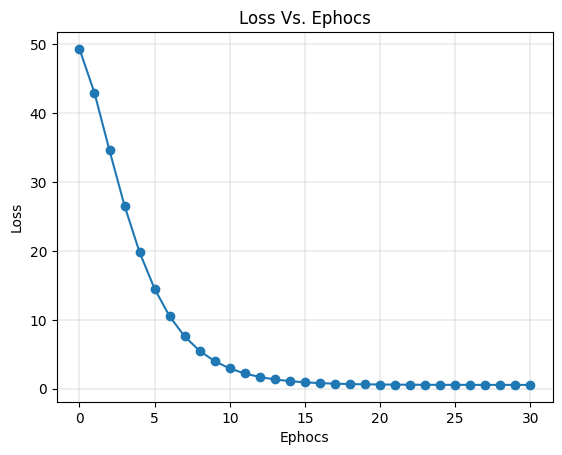

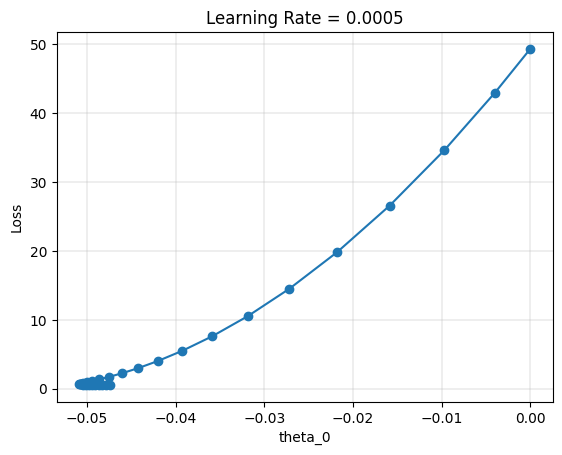

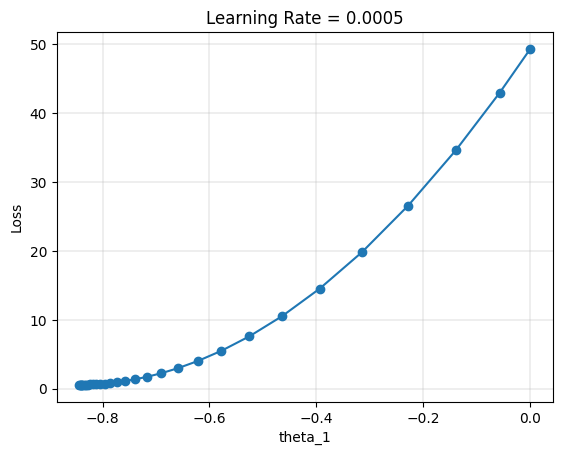

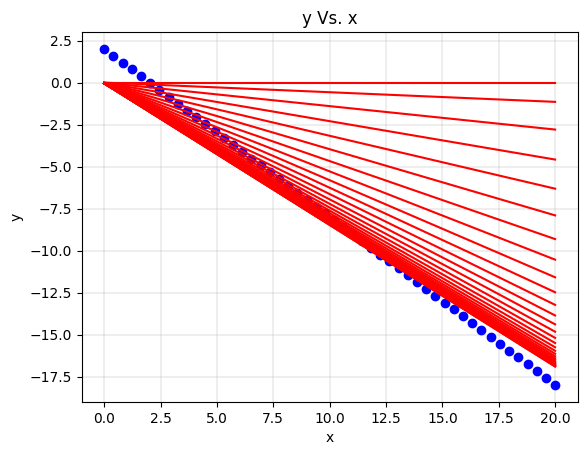

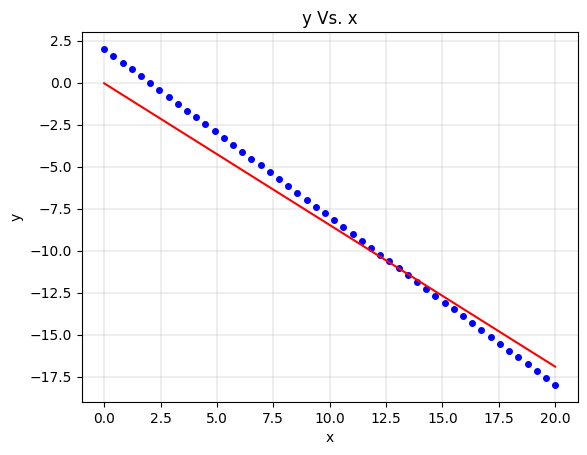

In [15]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [16]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = Mom_BGD_single_var(X, y, 0.0005, 0.9, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

v_0 :  0.004
v_1 :  0.05734693877551021

thet

In [17]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.973589591111118


#### Extraction Data and plotting

<Figure size 640x480 with 0 Axes>

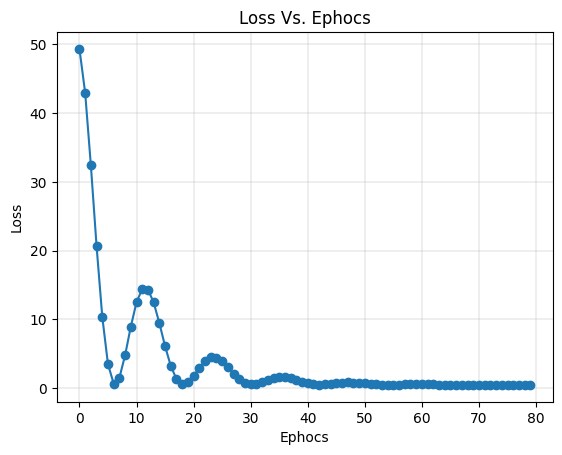

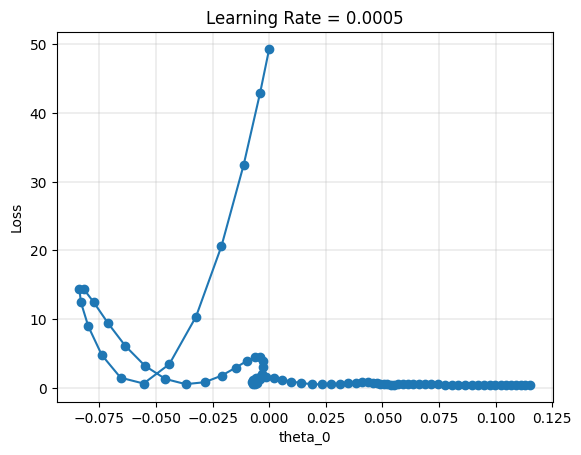

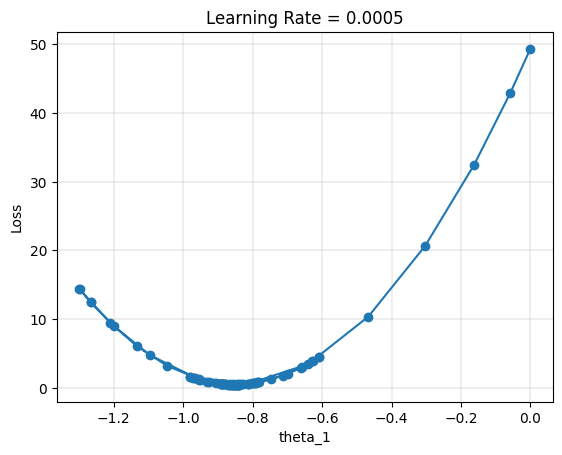

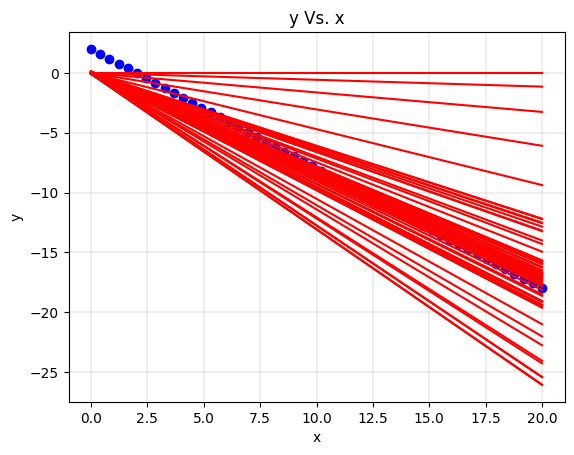

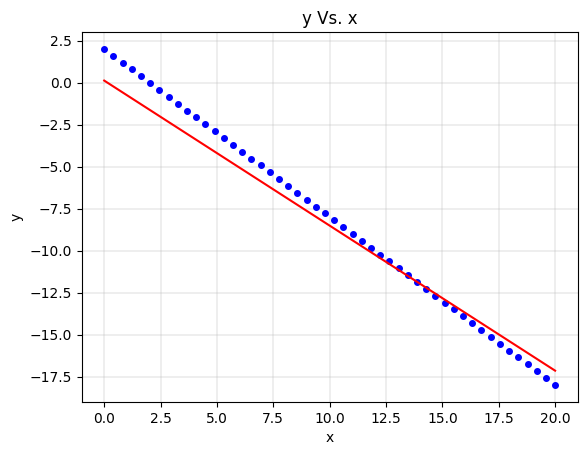

In [18]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [19]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = Mom_BGD_single_var(X, y, 0.0005, 0.89, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

v_0 :  0.004
v_1 :  0.05734693877551021

thet

In [20]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.972435565060376


<Figure size 640x480 with 0 Axes>

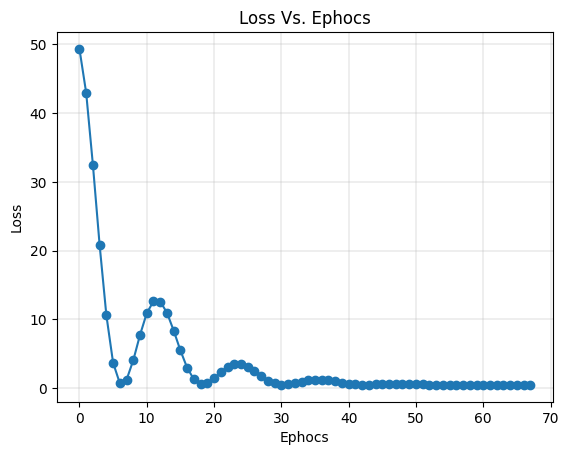

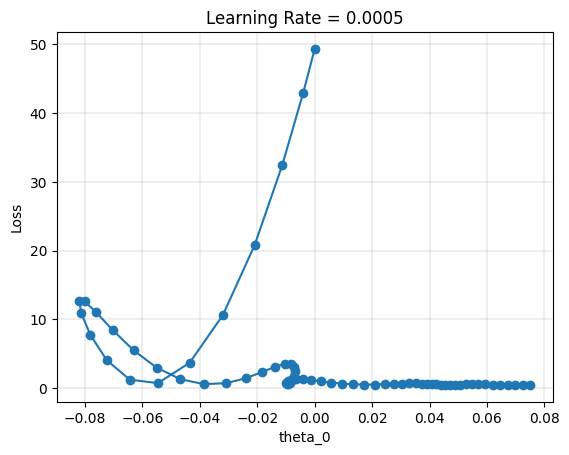

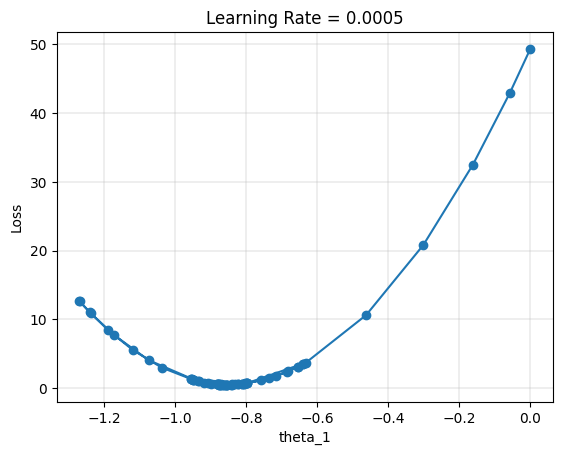

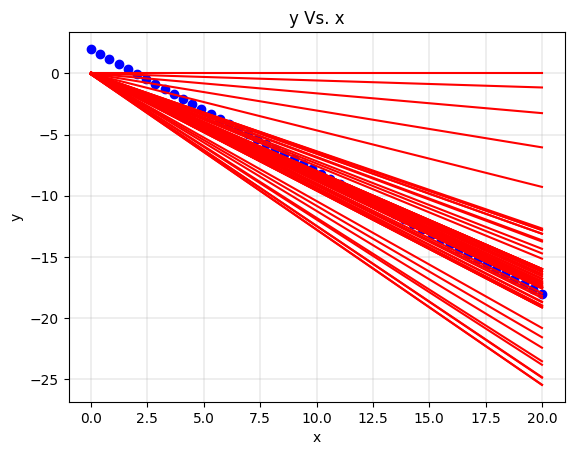

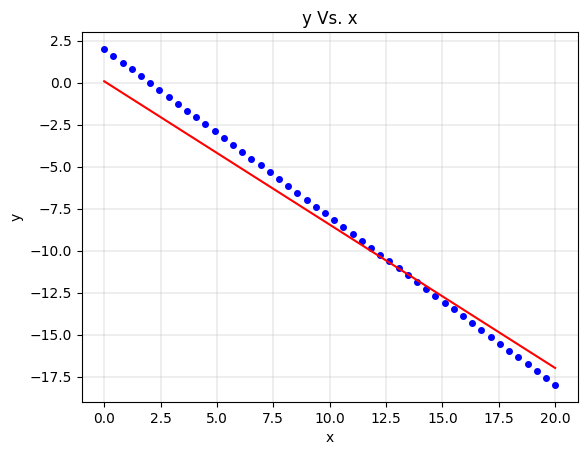

In [21]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

#### The following results uses alpha = 0.0005, gamma=0.98 and max. iterations = 300

In [22]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = Mom_BGD_single_var(X, y, 0.0005, 0.98, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

v_0 :  0.004
v_1 :  0.05734693877551021

thet

In [23]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9930094476023228


<Figure size 640x480 with 0 Axes>

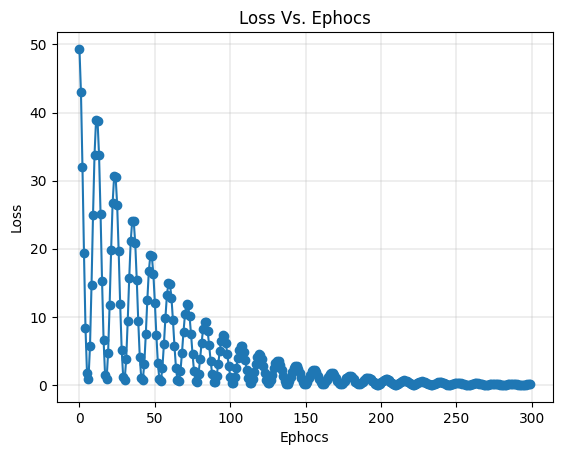

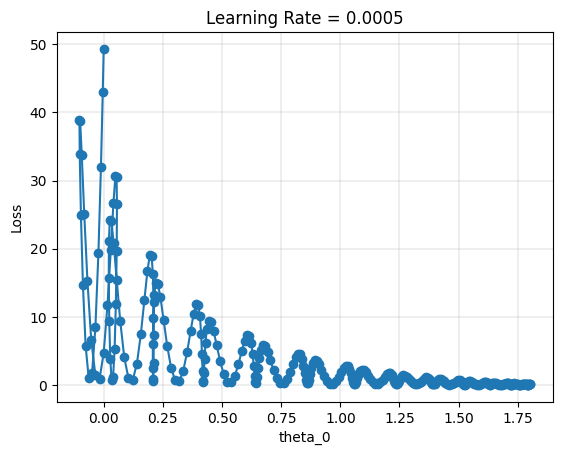

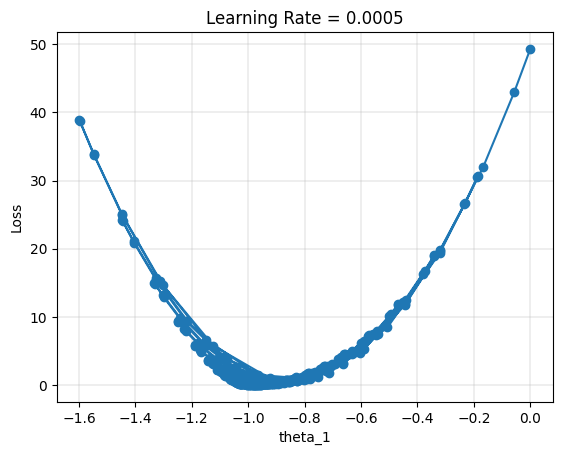

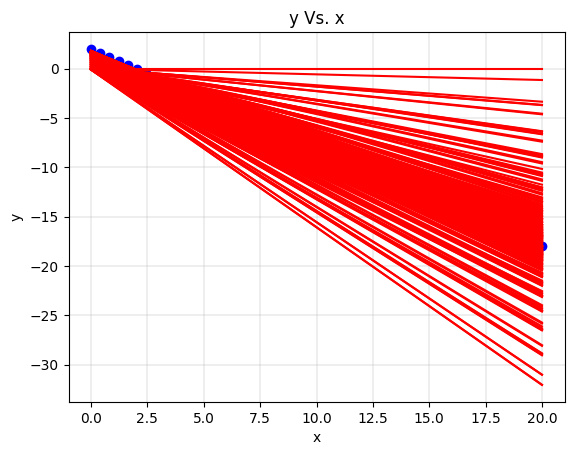

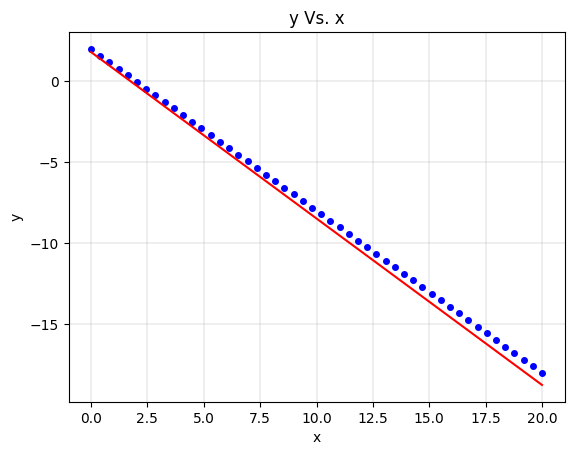

In [24]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

#### The following results uses alpha = 0.0005, gamma=0.2 and max. iterations = 300

In [25]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = Mom_BGD_single_var(X, y, 0.0005, 0.2, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

v_0 :  0.004
v_1 :  0.05734693877551021

thet

In [26]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.968684836673573


<Figure size 640x480 with 0 Axes>

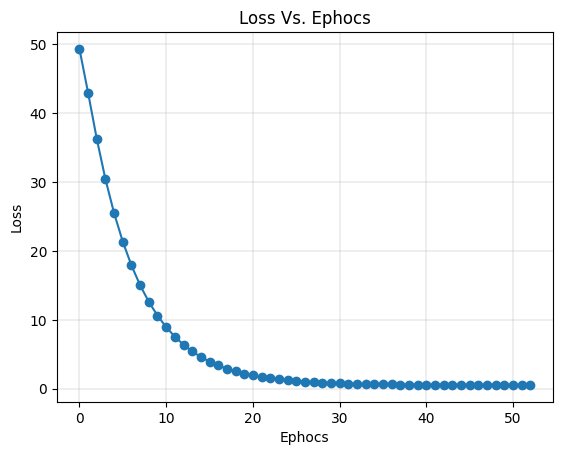

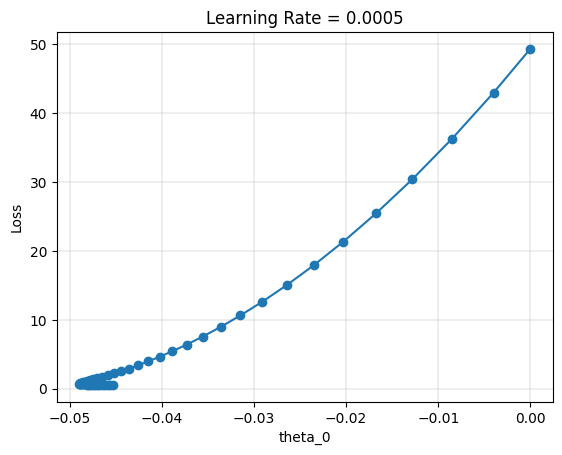

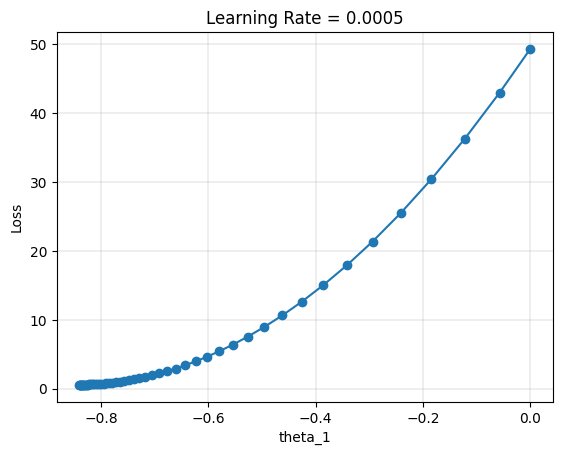

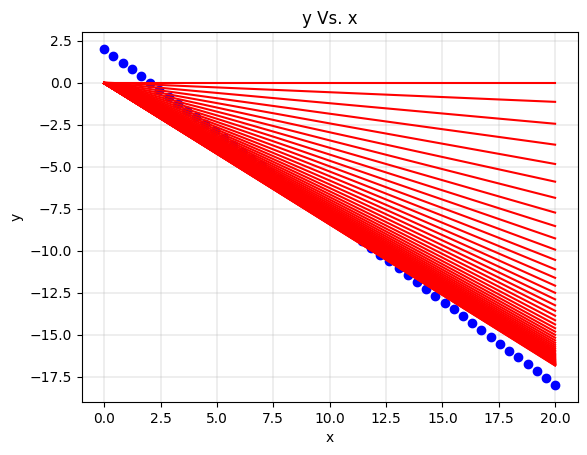

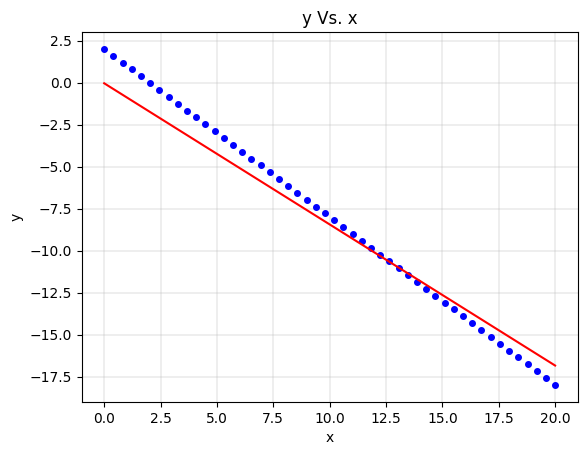

In [27]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

#### The following results uses alpha = 0.0005, gamma=0 and max. iterations = 300

In [28]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = Mom_BGD_single_var(X, y, 0.0005, 0, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

v_0 :  0.004
v_1 :  0.05734693877551021

thet

In [29]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9686158031920962


<Figure size 640x480 with 0 Axes>

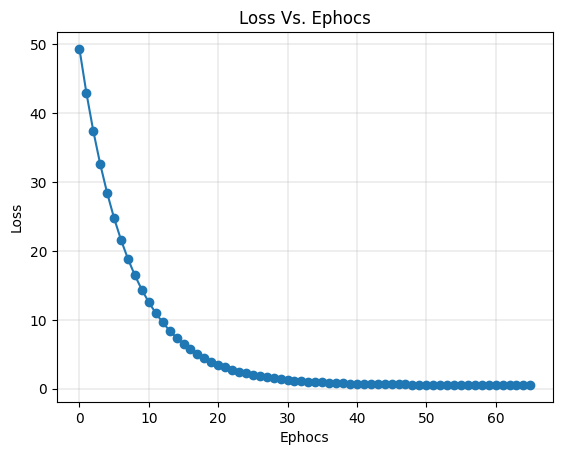

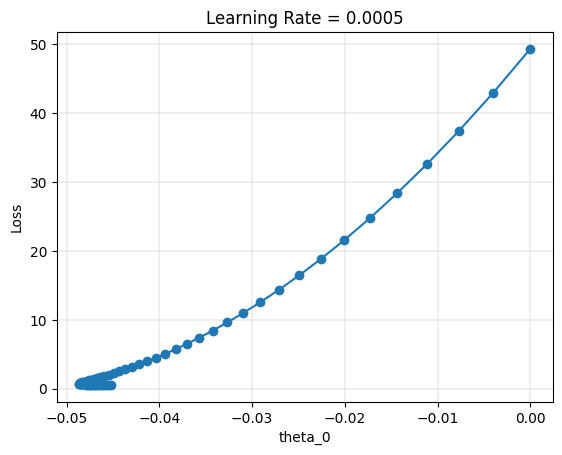

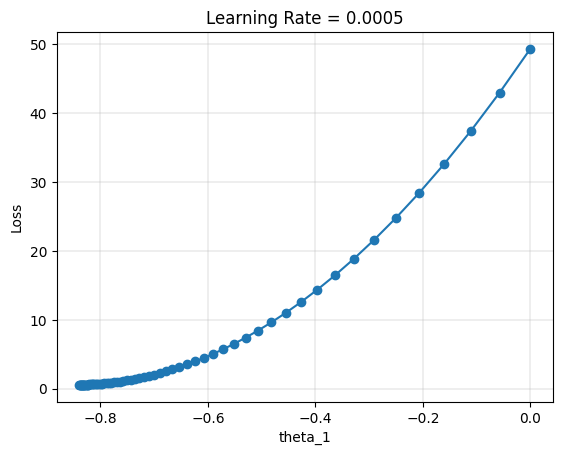

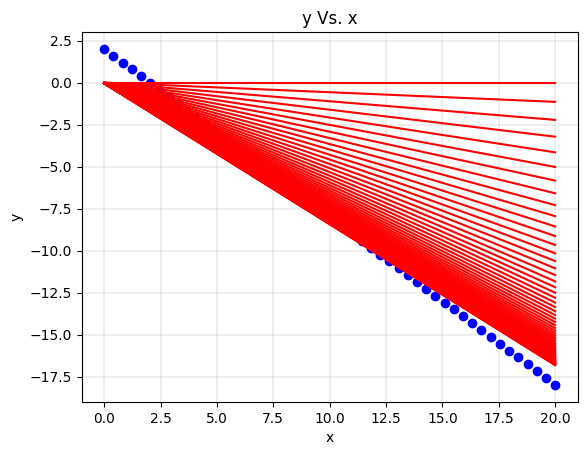

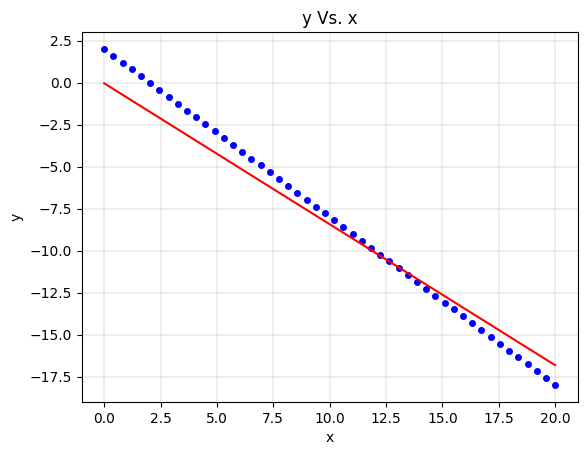

In [30]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

#### The following results uses alpha = 0.0005, gamma=0.01 and max. iterations = 300

In [31]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = Mom_BGD_single_var(X, y, 0.0005, 0.01, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

v_0 :  0.004
v_1 :  0.05734693877551021

thet

In [32]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9685999968484483


<Figure size 640x480 with 0 Axes>

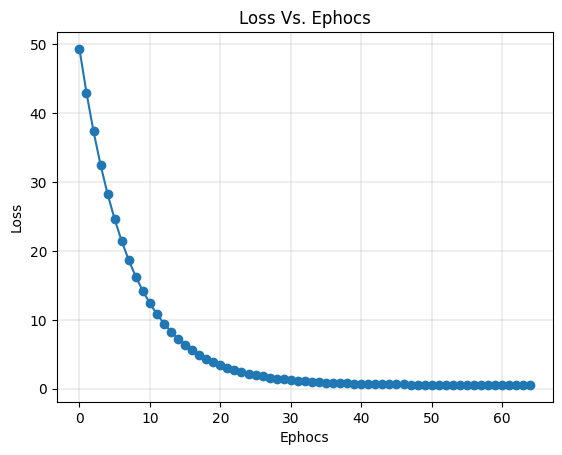

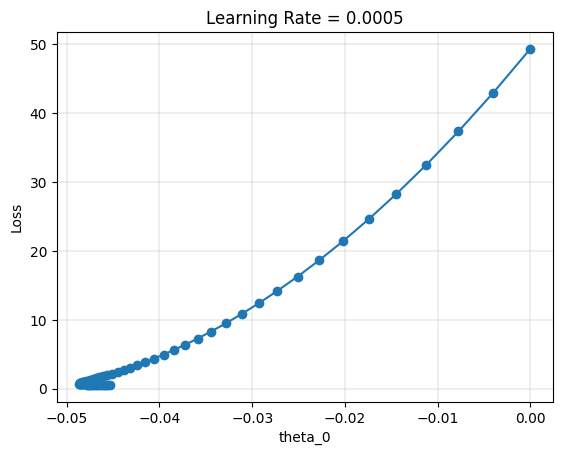

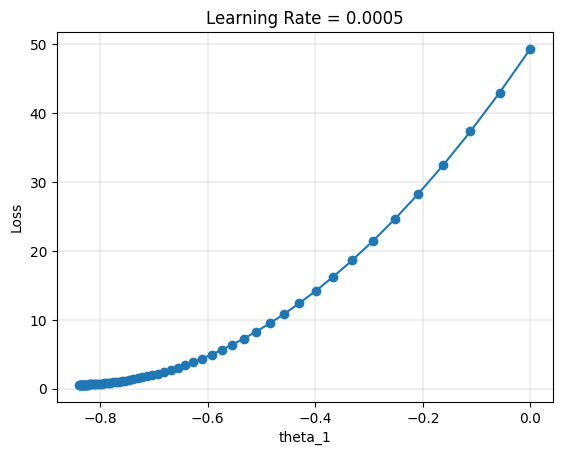

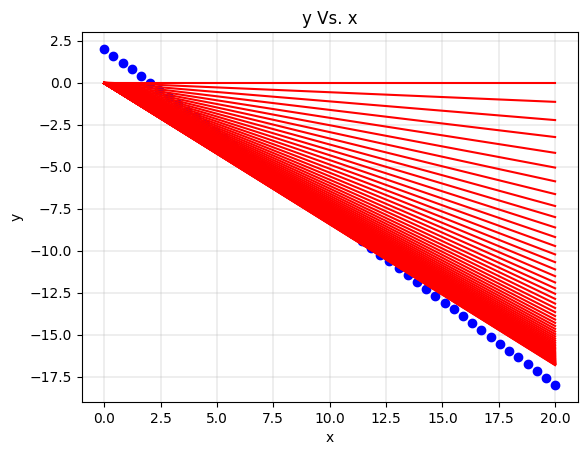

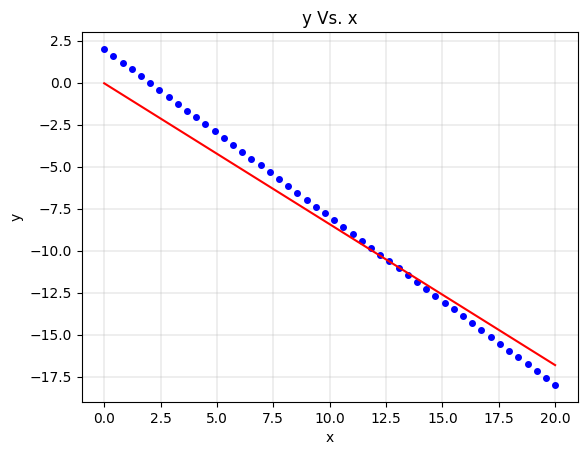

In [33]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

#### The following results uses alpha = 0.0005, gamma=1 and max. iterations = 300

In [34]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = Mom_BGD_single_var(X, y, 0.0005, 1, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

v_0 :  0.004
v_1 :  0.05734693877551021

thet


Gradient Vector:
 [[7.6207081421531235], [95.9950293584839]]

Gradient Vector Norm:
 96.2970448878057

v_0 :  -0.017219119284500546
v_1 :  -0.09798510093620727

theta_0_new:  3.934342267845394
theta_1_new:  -0.3316563997045696

****************** Training 239 ********************

h(x):
 [ 3.93434227  3.79897231  3.66360235  3.52823239  3.39286243  3.25749247
  3.12212251  2.98675255  2.8513826   2.71601264  2.58064268  2.44527272
  2.30990276  2.1745328   2.03916284  1.90379288  1.76842292  1.63305296
  1.497683    1.36231305  1.22694309  1.09157313  0.95620317  0.82083321
  0.68546325  0.55009329  0.41472333  0.27935337  0.14398341  0.00861346
 -0.1267565  -0.26212646 -0.39749642 -0.53286638 -0.66823634 -0.8036063
 -0.93897626 -1.07434622 -1.20971618 -1.34508614 -1.48045609 -1.61582605
 -1.75119601 -1.88656597 -2.02193593 -2.15730589 -2.29267585 -2.42804581
 -2.56341577 -2.69878573]

Error Vector:
 [ 1.93434227  2.20713557  2.47992888  2.75272219  3.02551549  3.2983088
  3.57110211 

In [35]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  -1.4979771915880735


<Figure size 640x480 with 0 Axes>

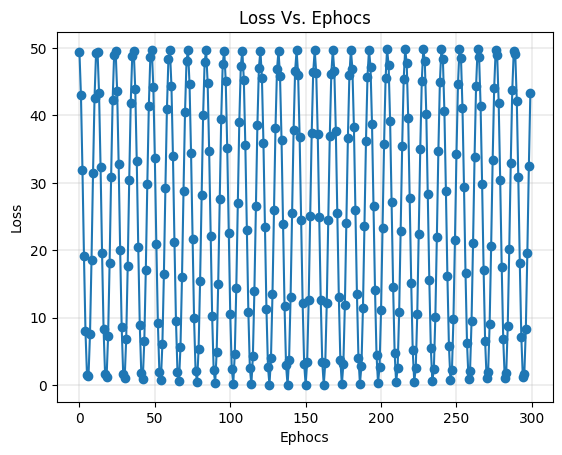

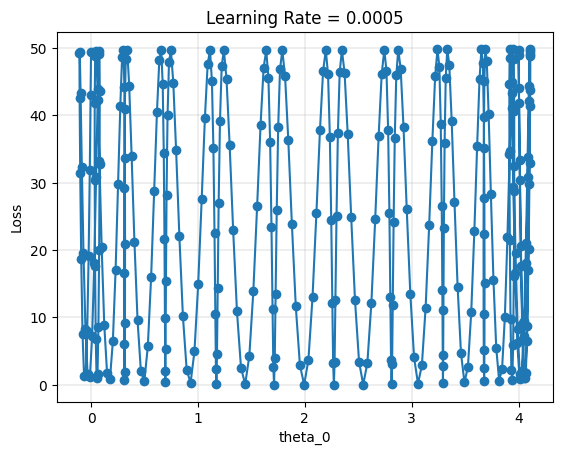

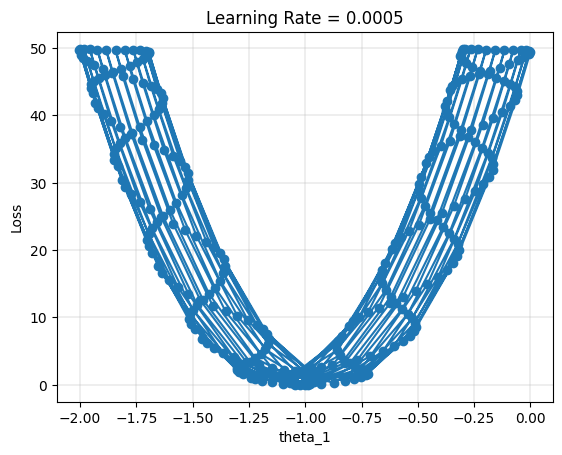

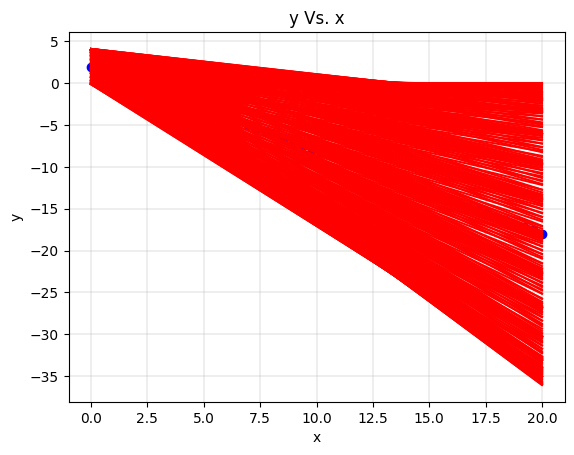

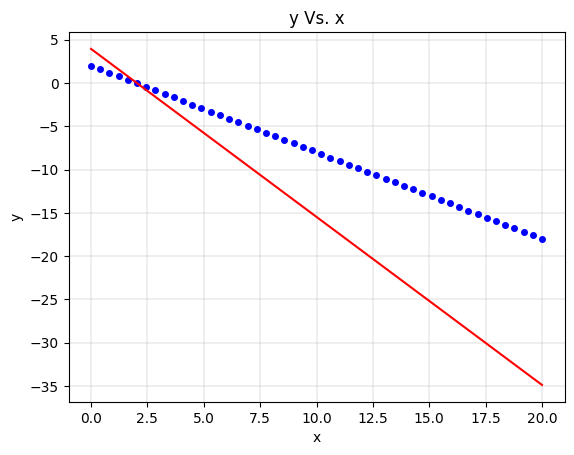

In [36]:
all_plots(theta_cost_vec, X, y, y_pred_GD)
# converge

#### The following results uses alpha = 0.01, gamma=1 and max. iterations = 300

In [37]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = Mom_BGD_single_var(X, y, 0.01, 1, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

v_0 :  0.08
v_1 :  1.1469387755102043

theta_

In [38]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.6734657213174122


<Figure size 640x480 with 0 Axes>

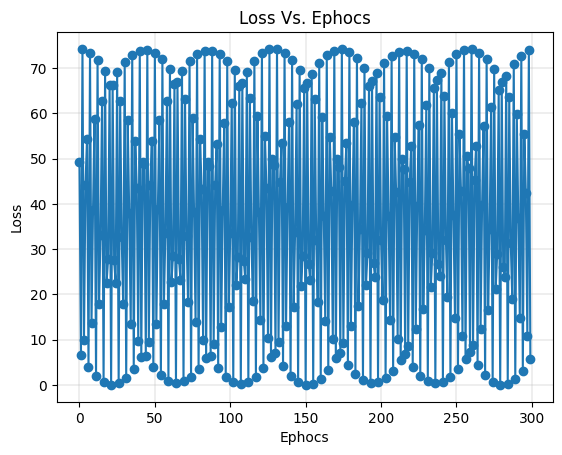

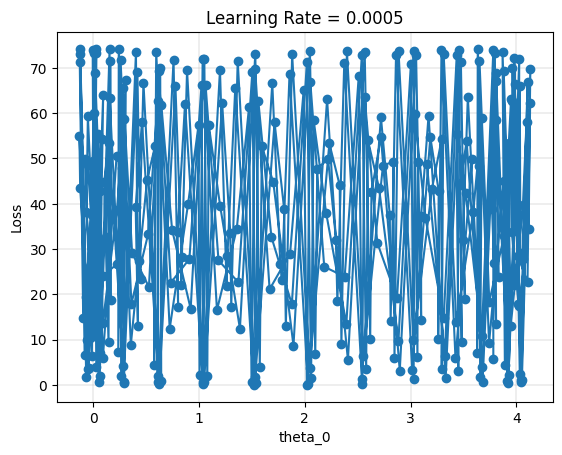

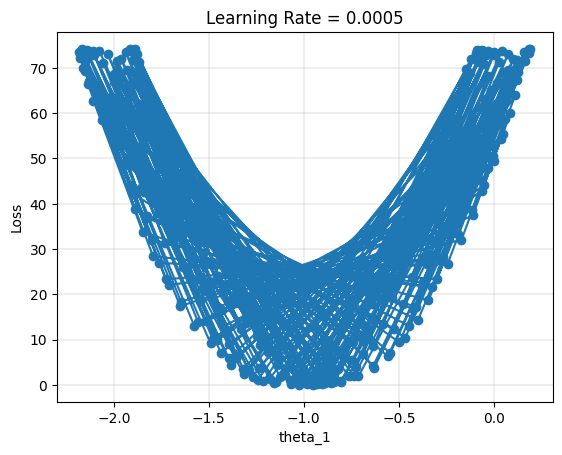

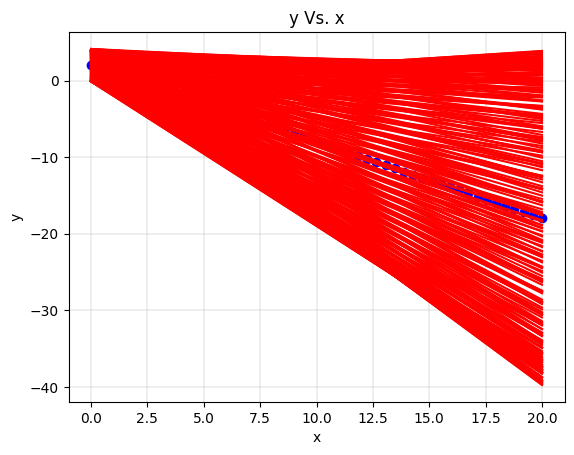

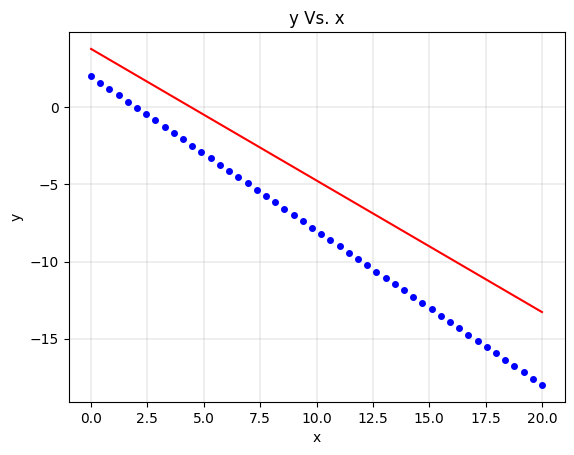

In [39]:
all_plots(theta_cost_vec, X, y, y_pred_GD)
# diverge

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [40]:
def NAG_single_var(X, Y, LR, G, Max_iter):
    # step_1
#     theta0_temp = 0
#     theta1_temp = 0
    theta_0 = 0
    theta_1 = 0
    v_t_0 = 0
    v_t_1 = 0
    m = len(X)
    Y_pred = []
    Thetas_Cost = []
        
    for i in range(Max_iter):
        print(f"\n****************** Training {i} ********************")
    # step_2:
        y_pred = theta_0 + (theta_1*X)
        
        theta0_temp = theta_0 - (G * v_t_0)
        theta1_temp = theta_1 - (G * v_t_1)
        
        y_pred_temp = theta0_temp + (theta1_temp*X)
        print("\nh(x):\n", y_pred)
        Y_pred.append(y_pred)
        
    # step_3
        Error = y_pred - Y
        Error_temp = y_pred_temp - Y
        cost = (1/(2*m)) * (Error @ Error)  
        print("\nError Vector:\n", Error)
        print("\nj: ", cost)
        
        Thetas_Cost.append([i, theta_0, theta_1, cost])         # append values of thetas and cost 
    
    # step_4
        d_theta_0 = (1/m) * sum(Error * 1)
        d_theta_1 = (1/m) * sum(Error * X)
        d_theta_0_temp = (1/m) * sum(Error_temp * 1)
        d_theta_1_temp = (1/m) * sum(Error_temp * X)
        GV = [[d_theta_0], 
             [d_theta_1]]
        GV_norm = np.linalg.norm(GV)
        print("\nGradient Vector:\n", GV)
        print("\nGradient Vector Norm:\n", GV_norm)
        
        if (GV_norm < 0.001) or ((i > 0) and (abs(Thetas_Cost[i][3] - Thetas_Cost[i-1][3])) < 0.001):       # (Gradient Check, convergence check)
            break
    
    # step_5
        theta_0 = theta0_temp - (LR * d_theta_0_temp)
        theta_1 = theta1_temp - (LR * d_theta_1_temp)
        v_t_0 = (G * v_t_0) + (LR * d_theta_0_temp)
        v_t_1 = (G * v_t_1) + (LR * d_theta_1_temp)
        print("\ntheta_0_new: ", theta_0)
        print("theta_1_new: ", theta_1)
        print("\nv_0 : ", v_t_0)
        print("v_1 : ", v_t_1)
    
    return np.array(Thetas_Cost), Error, np.array(Y_pred), [theta_0, theta_1]
    

#### The following results uses alpha = 0.0005, gamma=1 and max. iterations = 300.

In [41]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = NAG_single_var(X, y, 0.0005, 1, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new:  -0.004
theta_1_new:  -0.0573469

In [42]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9948272901452309


<Figure size 640x480 with 0 Axes>

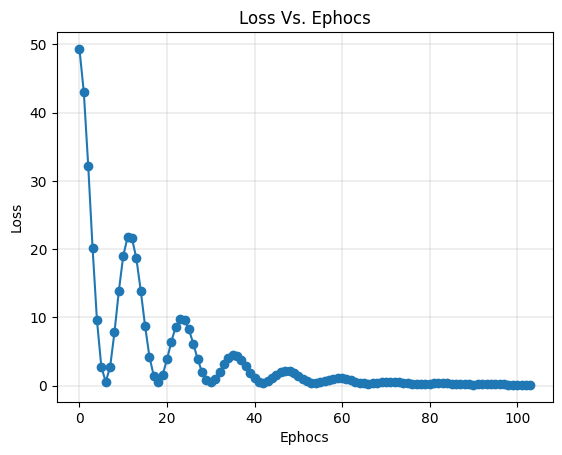

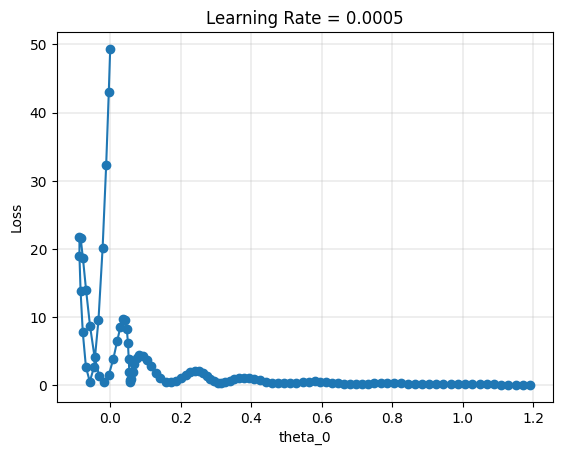

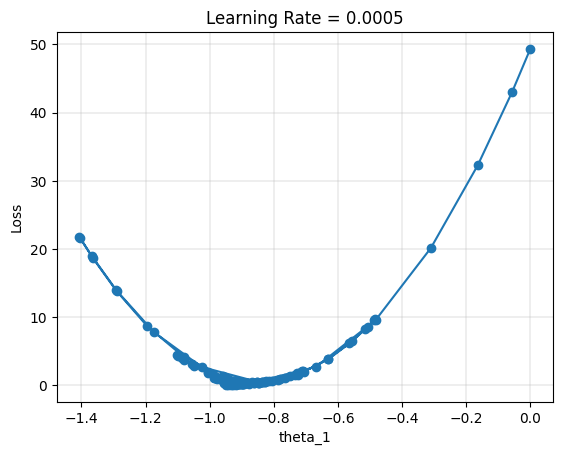

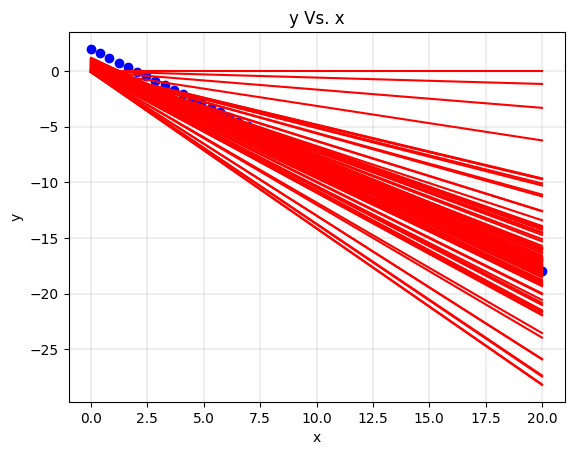

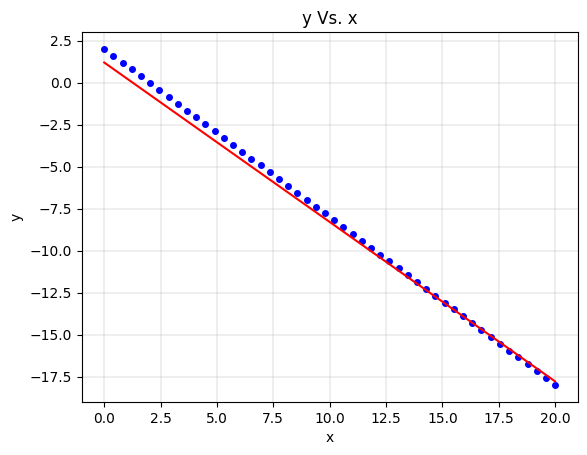

In [43]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

#### The following results uses alpha = 0.0005, gamma=0.98 and max. iterations = 300.

In [44]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = NAG_single_var(X, y, 0.0005, 0.98, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new:  -0.004
theta_1_new:  -0.0573469

In [45]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9815276292132524


<Figure size 640x480 with 0 Axes>

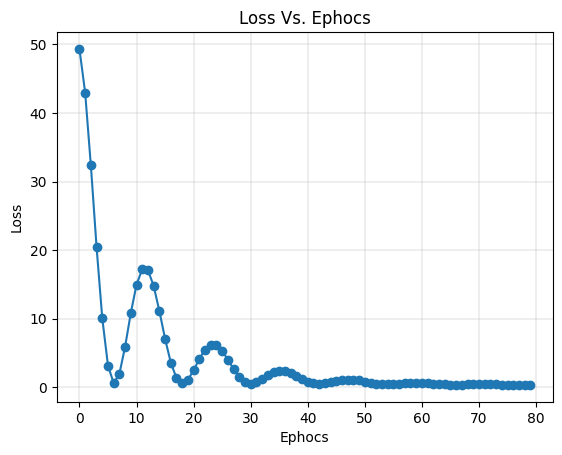

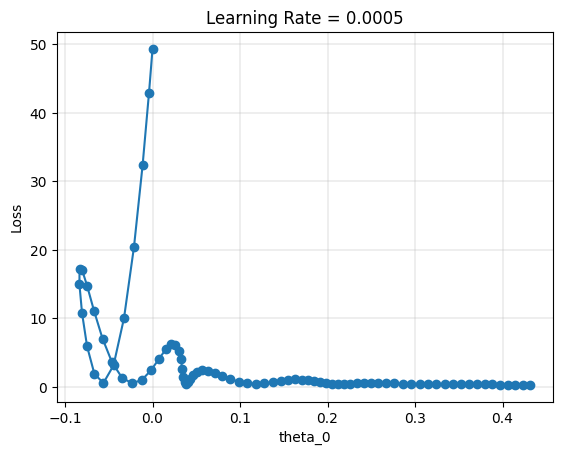

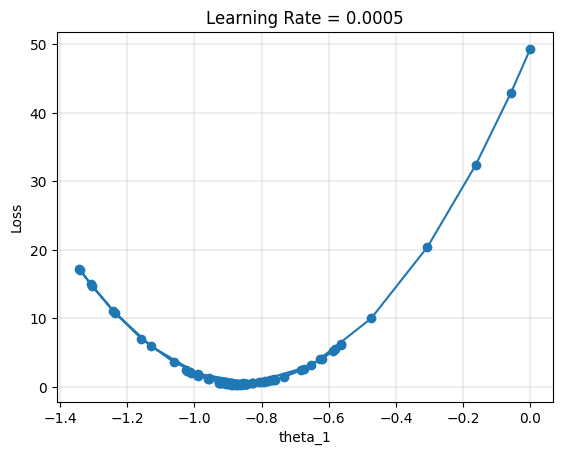

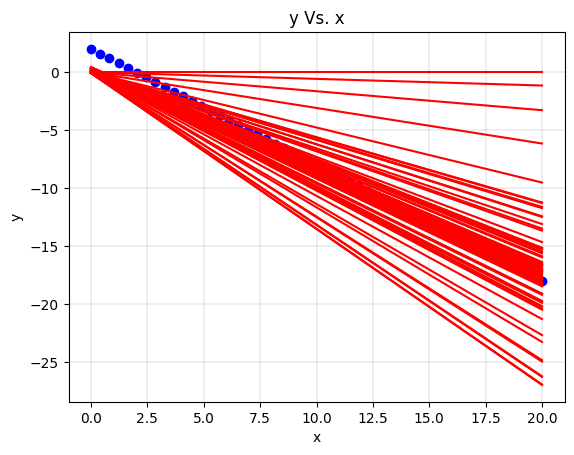

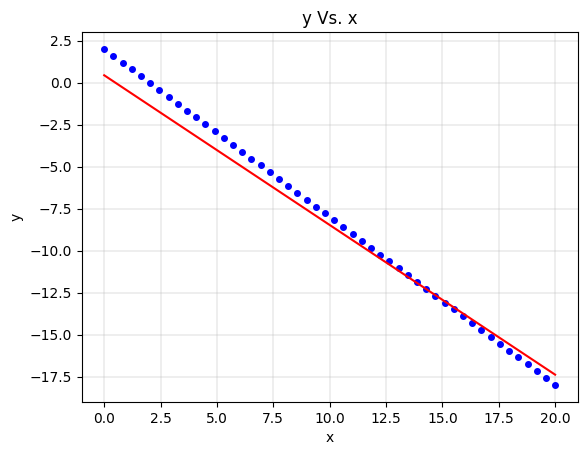

In [46]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [47]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = NAG_single_var(X, y, 0.0005, 0.9, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new:  -0.004
theta_1_new:  -0.0573469

In [48]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.971103130756324


<Figure size 640x480 with 0 Axes>

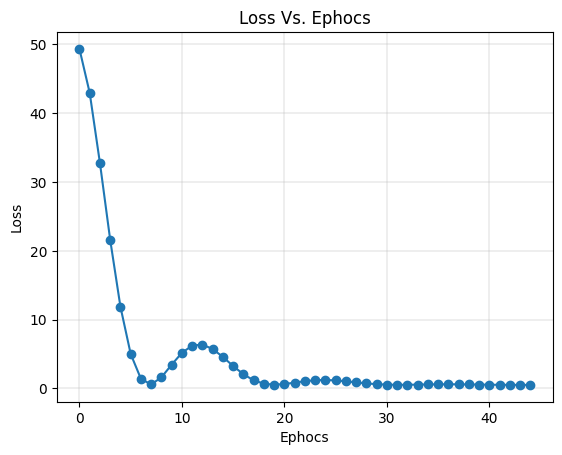

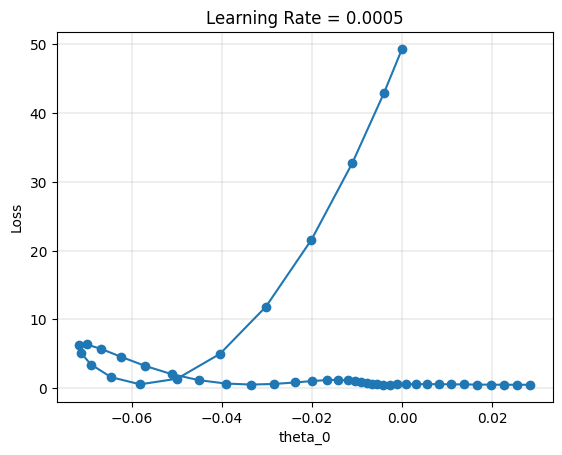

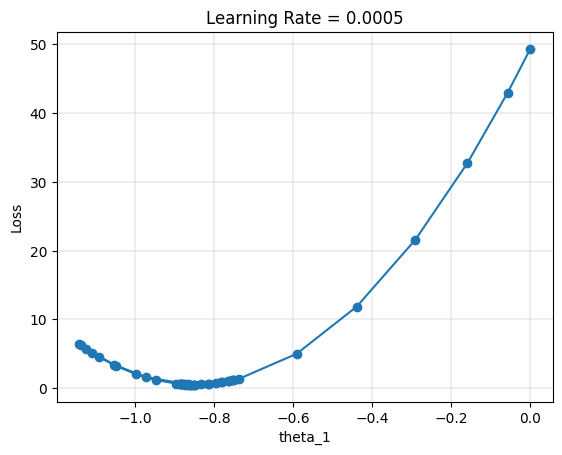

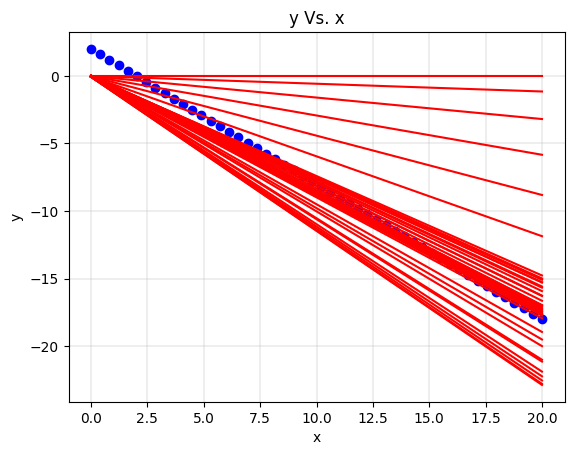

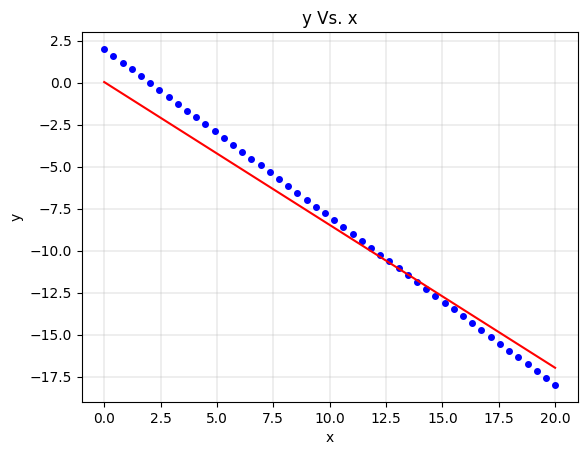

In [49]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [50]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = NAG_single_var(X, y, 0.0005, 0.89, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new:  -0.004
theta_1_new:  -0.0573469

In [51]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9699718983158406


<Figure size 640x480 with 0 Axes>

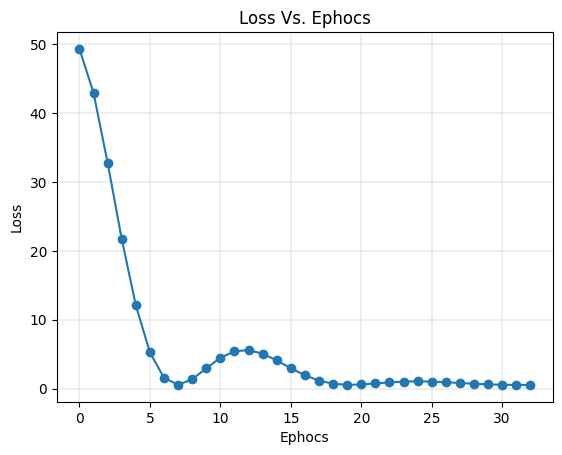

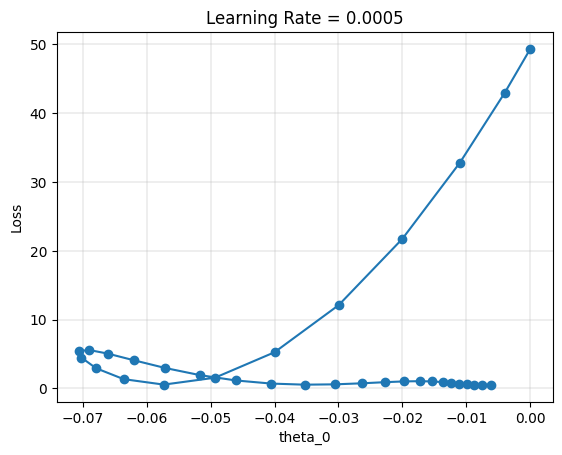

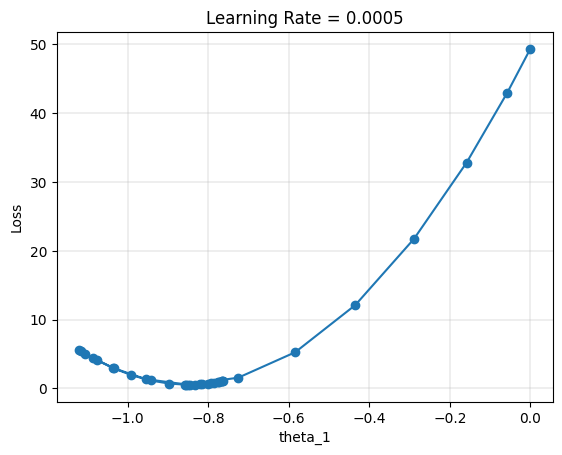

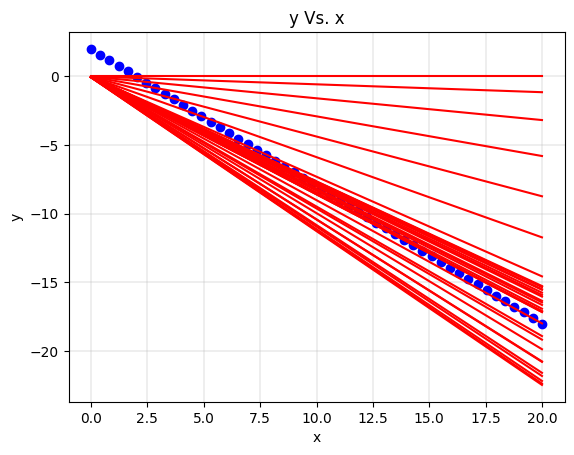

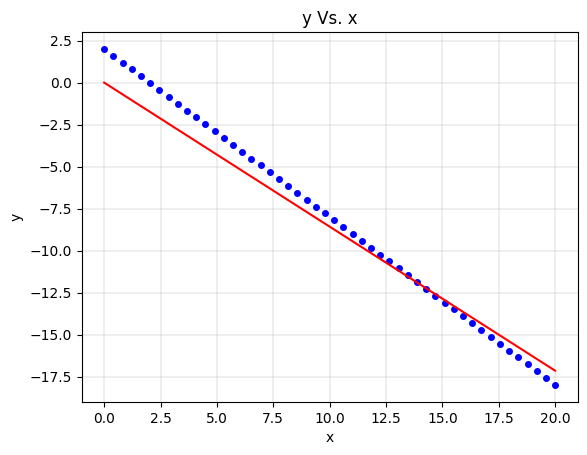

In [52]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

#### The following results uses alpha = 0.0005, gamma=0.8 and max. iterations = 300.

In [53]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = NAG_single_var(X, y, 0.0005, 0.8, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new:  -0.004
theta_1_new:  -0.0573469

In [54]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9679995024852612


<Figure size 640x480 with 0 Axes>

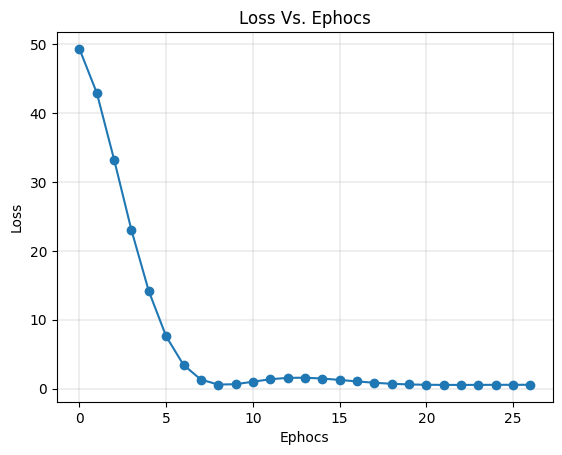

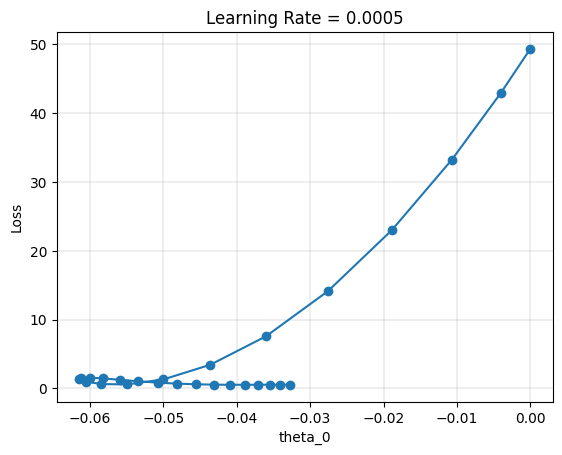

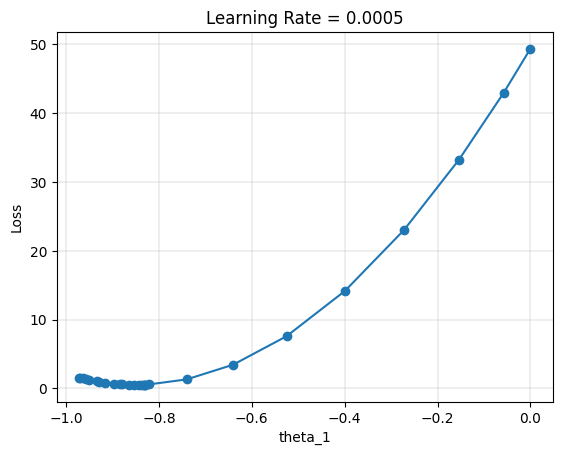

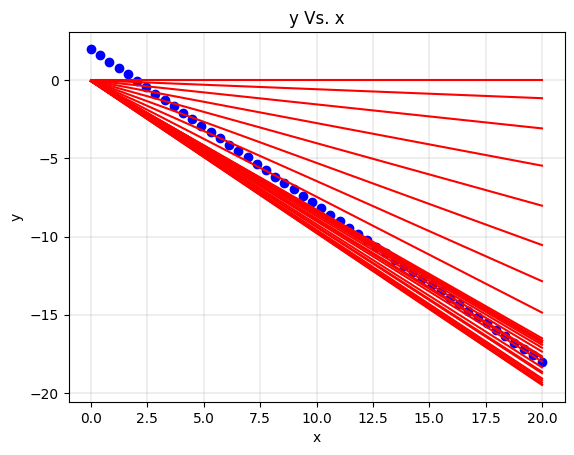

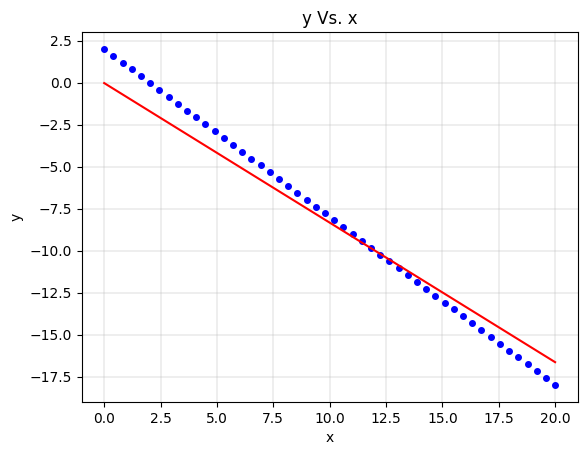

In [55]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

#### The following results uses alpha = 0.0005, gamma=0.7 and max. iterations = 300.

In [56]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = NAG_single_var(X, y, 0.0005, 0.7, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new:  -0.004
theta_1_new:  -0.0573469

In [57]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9657958300026394


<Figure size 640x480 with 0 Axes>

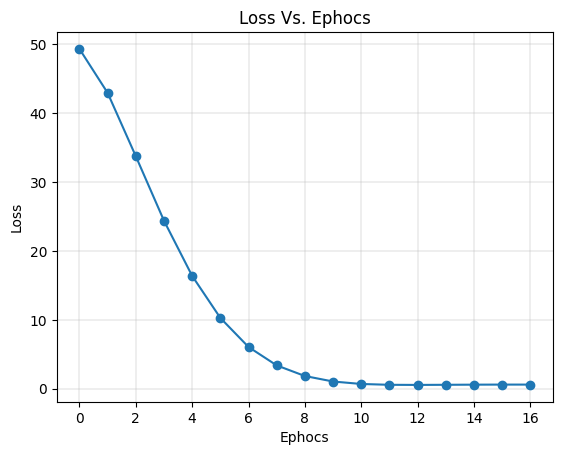

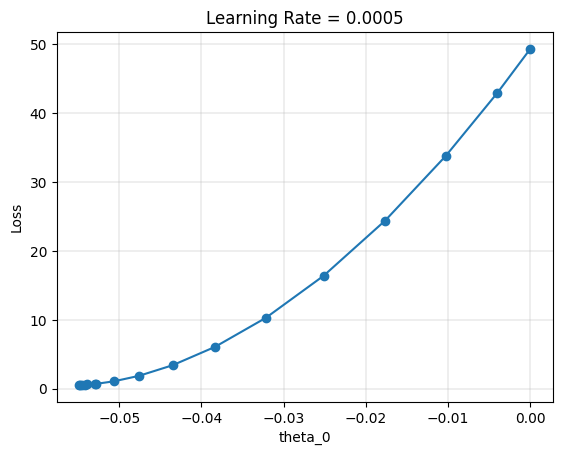

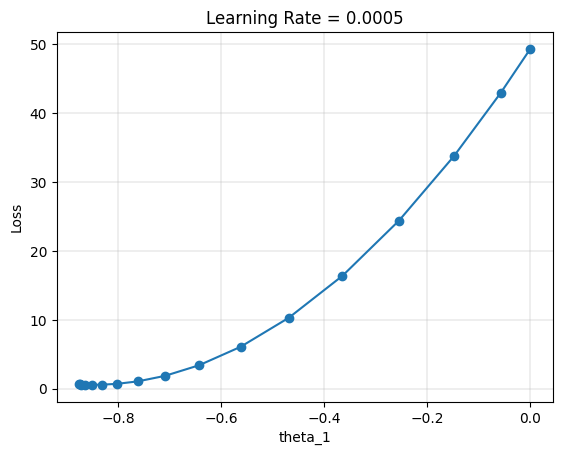

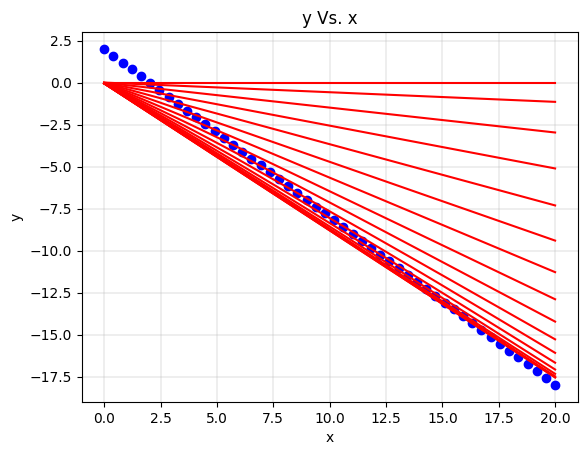

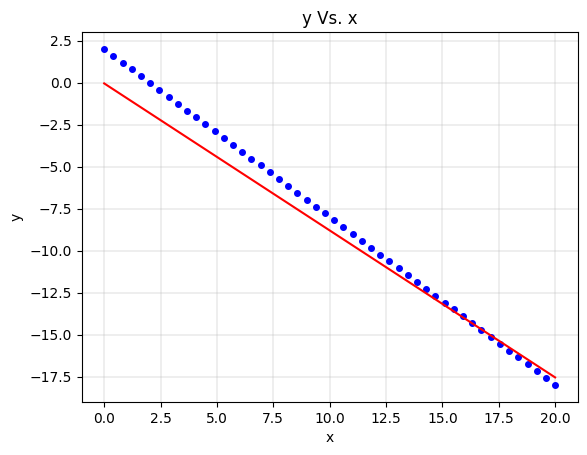

In [58]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

#### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [59]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = NAG_single_var(X, y, 0.0005, 0.5, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new:  -0.004
theta_1_new:  -0.0573469

In [60]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9688166612488043


<Figure size 640x480 with 0 Axes>

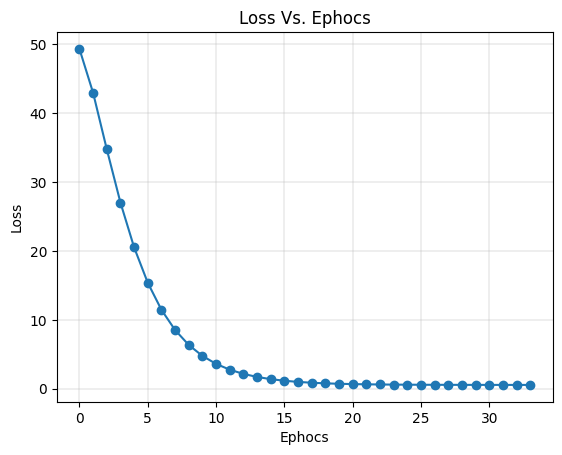

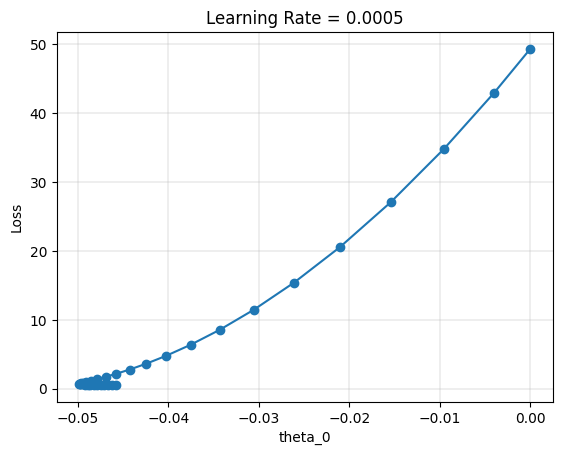

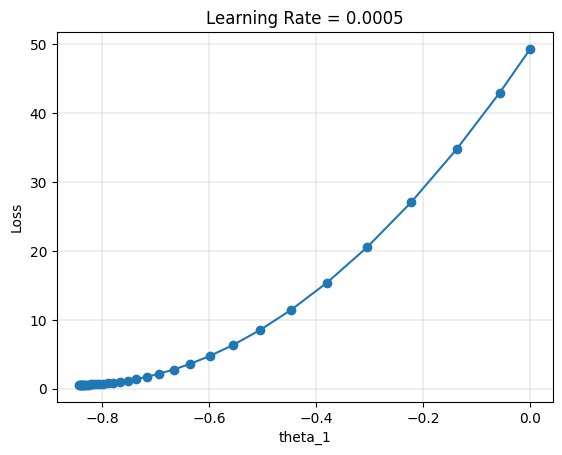

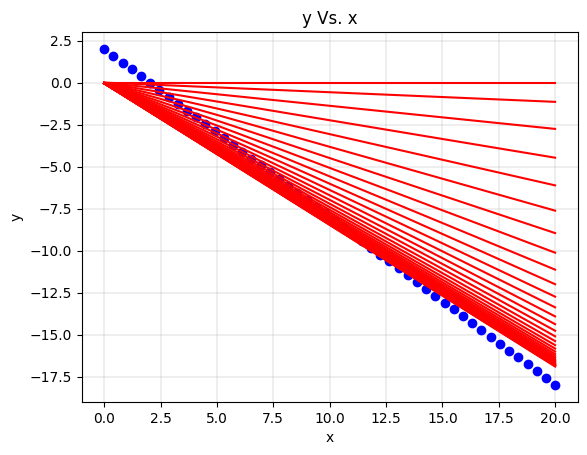

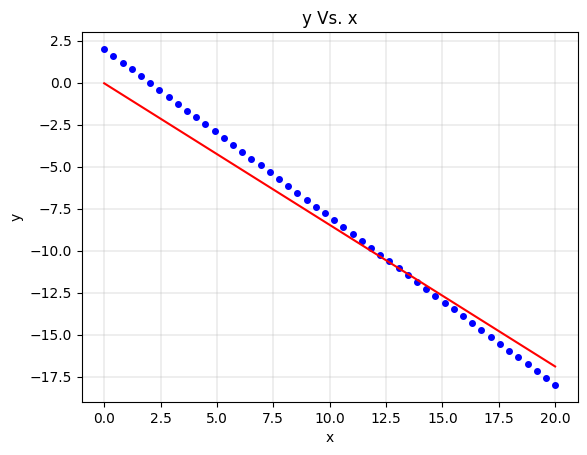

In [61]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

#### The following results uses alpha = 0.0005, gamma=0.2 and max. iterations = 300.

In [62]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = NAG_single_var(X, y, 0.0005, 0.2, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new:  -0.004
theta_1_new:  -0.0573469

In [63]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9686936435000996


<Figure size 640x480 with 0 Axes>

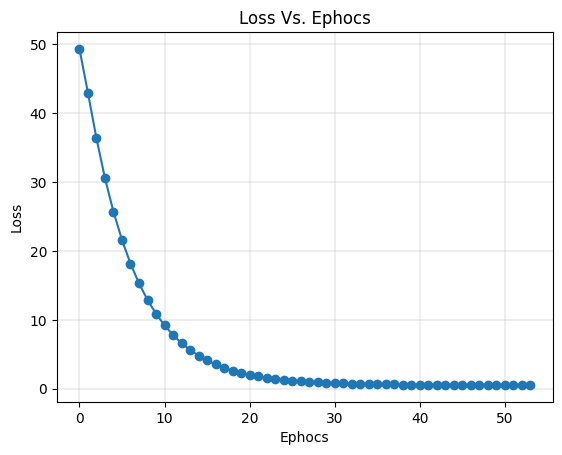

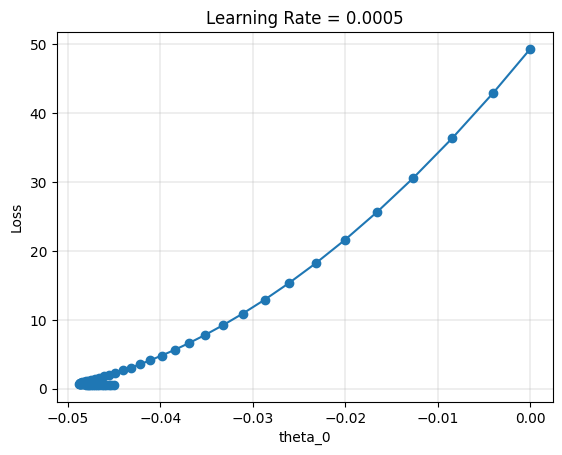

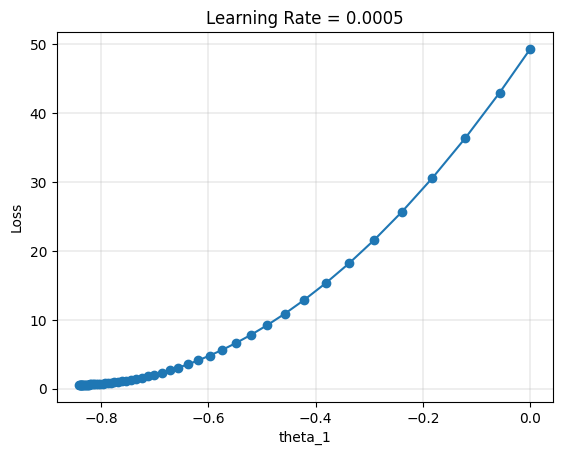

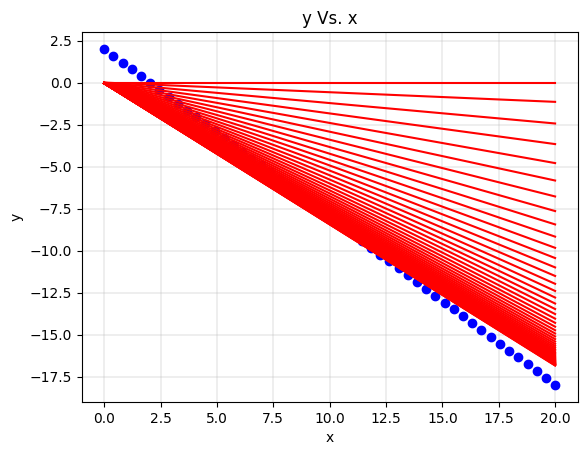

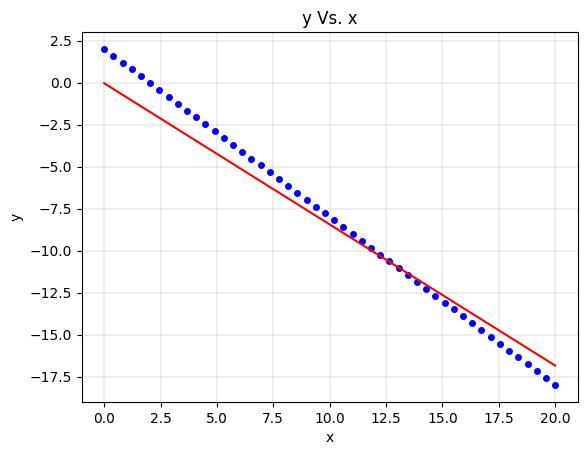

In [64]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

#### The following results uses alpha = 0.0005, gamma=0.01 and max. iterations = 300.

In [65]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = NAG_single_var(X, y, 0.0005, 0.01, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new:  -0.004
theta_1_new:  -0.0573469

In [66]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9685977977345216


<Figure size 640x480 with 0 Axes>

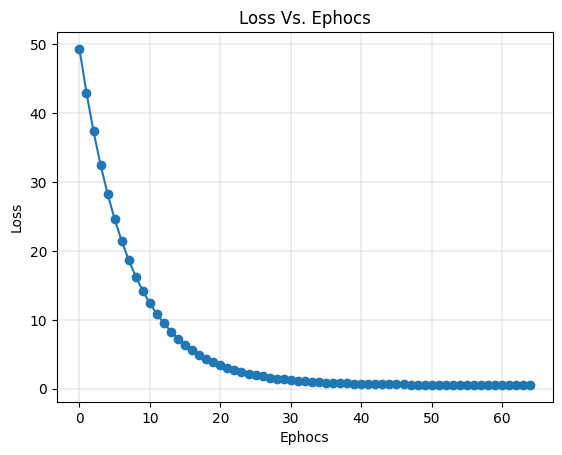

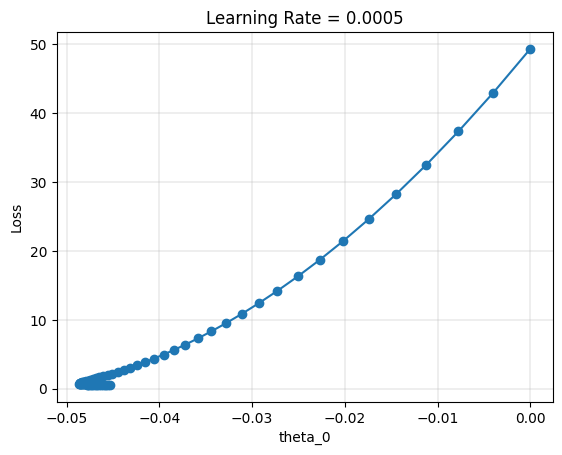

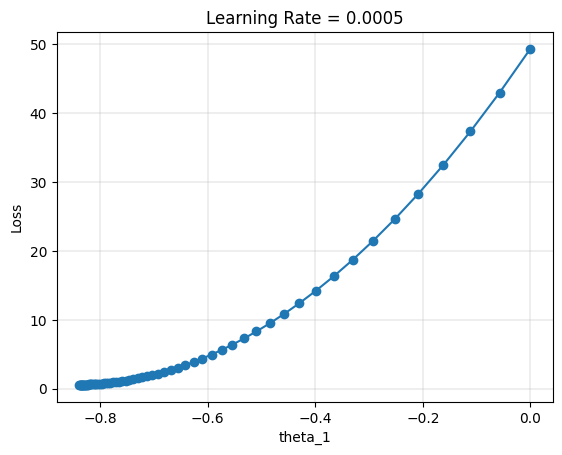

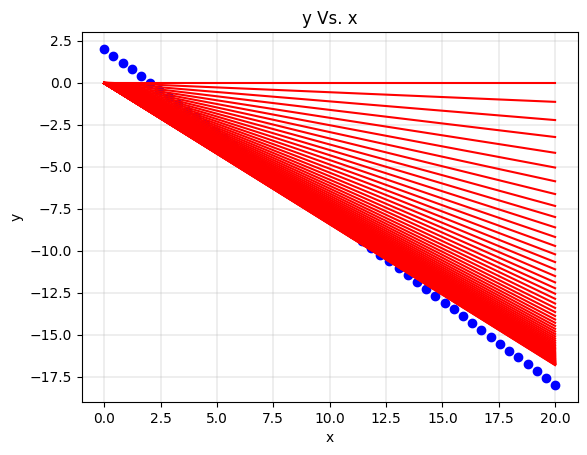

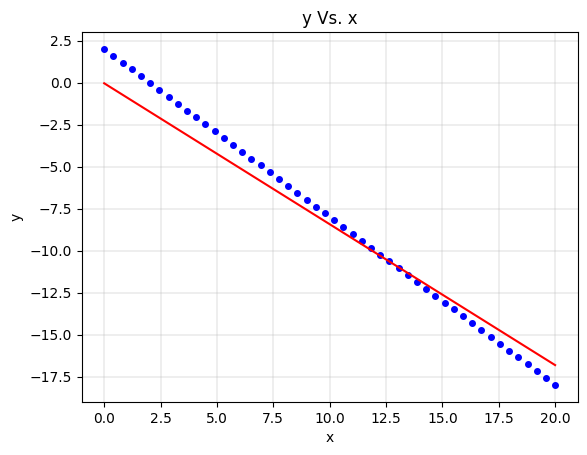

In [67]:
all_plots(theta_cost_vec, X, y, y_pred_GD)

#### The following results uses alpha = 0.0005, gamma=0 and max. iterations = 300.

In [68]:
theta_cost_vec, Error_vec, y_pred_GD, thetas_opt = NAG_single_var(X, y, 0.0005, 0, 300)
training_report((theta_cost_vec[-1][0] + 1), thetas_opt[0], thetas_opt[1], 
                Error_vec, theta_cost_vec[-1][3], y_pred_GD[-1], y)


****************** Training 0 ********************

h(x):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j:  49.34693877551021

Gradient Vector:
 [[8.0], [114.69387755102042]]

Gradient Vector Norm:
 114.97254258164628

theta_0_new:  -0.004
theta_1_new:  -0.0573469

In [69]:
score = r2_score(y,y_pred_GD[-1])
print("r2_score: ", score)

r2_score:  0.9686158031920962


<Figure size 640x480 with 0 Axes>

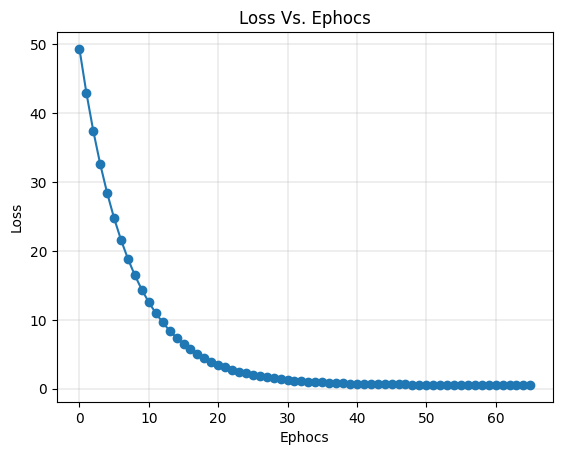

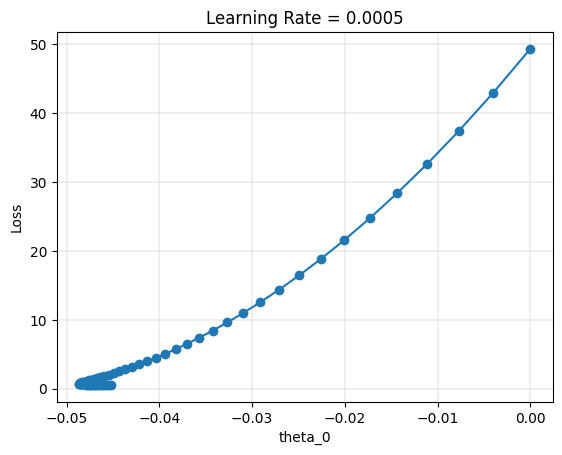

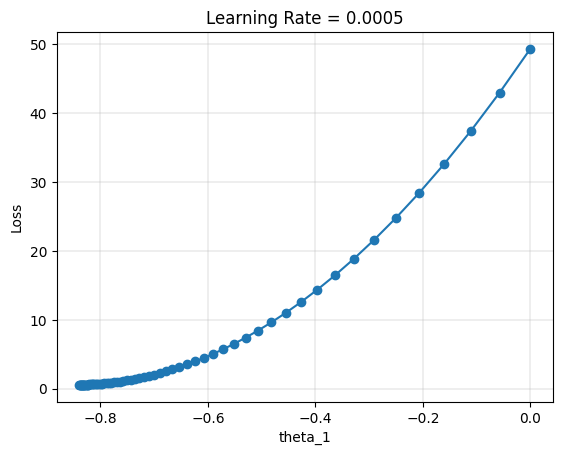

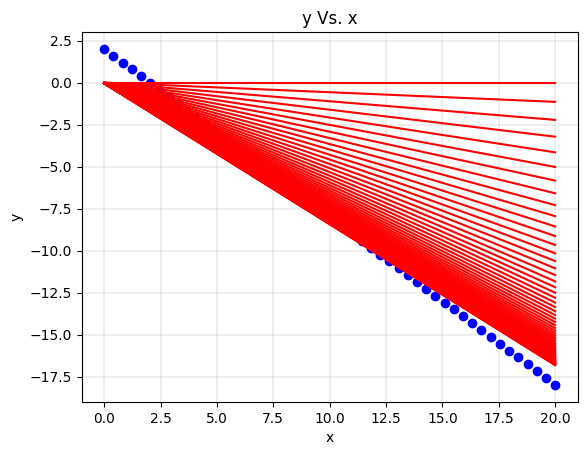

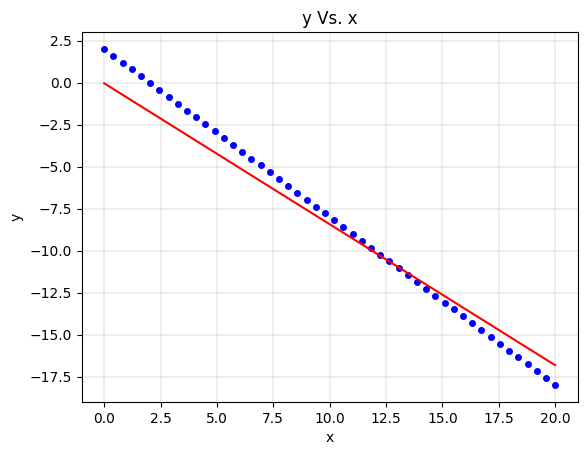

In [70]:
all_plots(theta_cost_vec, X, y, y_pred_GD)